# **Forest Cover Prediction**
### W207 Final Project | Spring 2020
### Authors: Nguyen, Sun, Yamaguchi

## **OUTLINE**
1. EDA  
2. Baseline 
    a. Data Preparation
    b. KNN 
    c. Logistic Regression  
    d. Naive Bayes
    e. Decision Tree
3. Preprocessing  
4. Feature Selections  
    a. L1/L2 regularization   
    b. ExtraTreeClassifier 
    c. RandomForestClassifier  
    d. RFE (Random Forest)  
    e. RFE (Logistic)  
    f. Manual Selection from EDA
    g. Feature Importance Ranking 
5. Models
    a. KNN
    b. Logistic Regression
    c. Naive Bayes
    d. Decision Tree
    e. Random Forest
    f. Neural Net
    g. GMM
    h. Ensemble
6. Results & Analysis





# **Libraries**

In [11]:
# # Colab libraries
# import pandas as pd
# from google.colab import files
# import io

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random

# SK-learn libraries for learning.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.ensemble import ExtraTreesClassifier
import theano.tensor
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from keras import optimizers
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from scipy import stats
import warnings

# **Load Data**

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# # uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# # Dataset is now stored in a Pandas Dataframe

In [12]:
# Data source: https://www.kaggle.com/c/forest-cover-type-prediction/overview
# Load data
warnings.filterwarnings('ignore')

train_path = '../data/train.csv'
# unlabeled_path = '../data/test.csv'
train_csv = np.genfromtxt(train_path, delimiter=',', names=True)
# unlabeled_csv = np.genfromtxt(unlabeled_path, delimiter=',', names=True)

# Extract feature and label strings
all_headers = train_csv.dtype.names
feature_name = train_csv.dtype.names[:-1]
label_name = set(train_csv['Cover_Type'])
df = pd.DataFrame(train_csv, columns=[i for i in all_headers])

In [5]:
df.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1.0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2.0,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,3.0,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4.0,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,5.0,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [13]:
# Extract feature and label strings
all_headers = df.columns
feature_name = all_headers[:-1]
label_name = set(df['Cover_Type'])

# **EDA**

In [14]:
stat_summary = df.describe().T
stat_summary

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [15]:
# Distribution of cover types
df.groupby('Cover_Type').size()

Cover_Type
1.0    2160
2.0    2160
3.0    2160
4.0    2160
5.0    2160
6.0    2160
7.0    2160
dtype: int64

We see that all classes have an equal presence. No class re-balancing is necessary.

In [16]:
# set the number of features considered
size = 10 

# create a dataframe with only 'size' features
data = df.iloc[:,:size] 

# get the names of all the columns
cols = df.columns 

# Calculates pearson correlation co-efficient for all combinations
data_corr = df.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

# Search for the highly correlated pairs
for i in range(0,size): # for 'size' features
    for j in range(i+1,size): # avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) # store correlation and columns index

# Sort to show higher ones first (absolute value)           
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

# Print correlations and column names above threshold
for v,i,j in s_corr_list:
    print ("{} and {} = {:.2f}".format(cols[i], cols[j], v))


Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


This represents an opportunity to reduce the feature set through transformations.

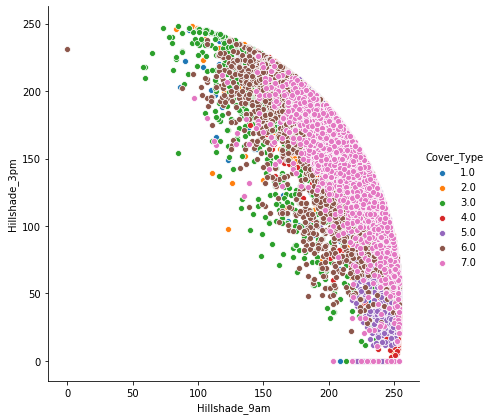

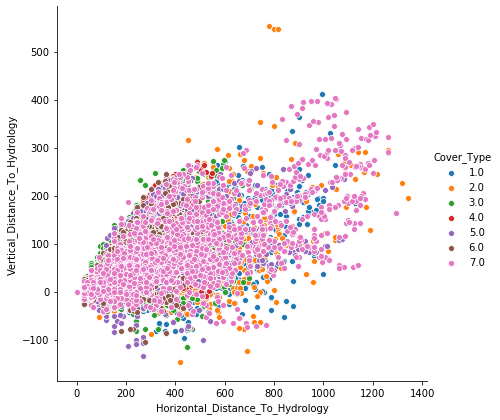

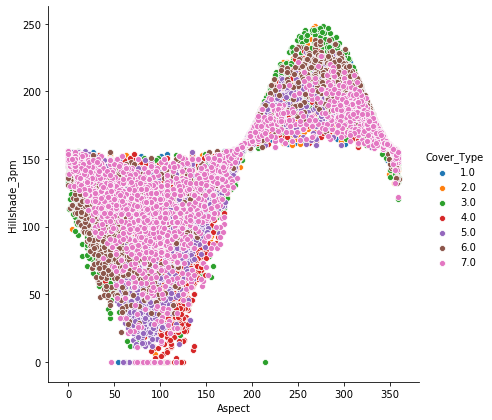

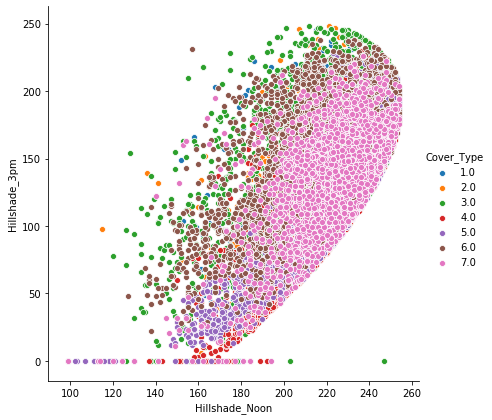

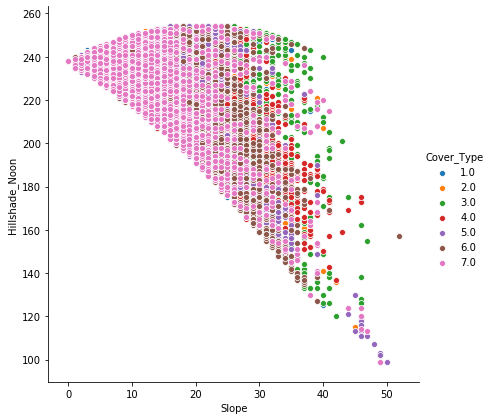

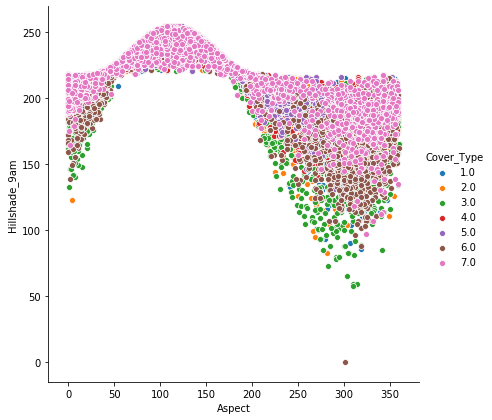

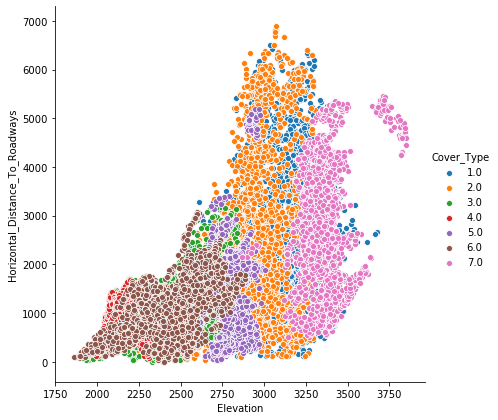

In [17]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sn.pairplot(df, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

The plots show which class does a point belong to. The class distribution overlaps in the plots.
Hillshade patterns give a nice ellipsoid patterns with each other. Aspect and Hillshades attributes form a sigmoid pattern. Horizontal and vertical distance to hydrology give an almost linear pattern.

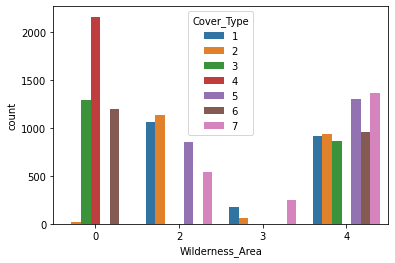

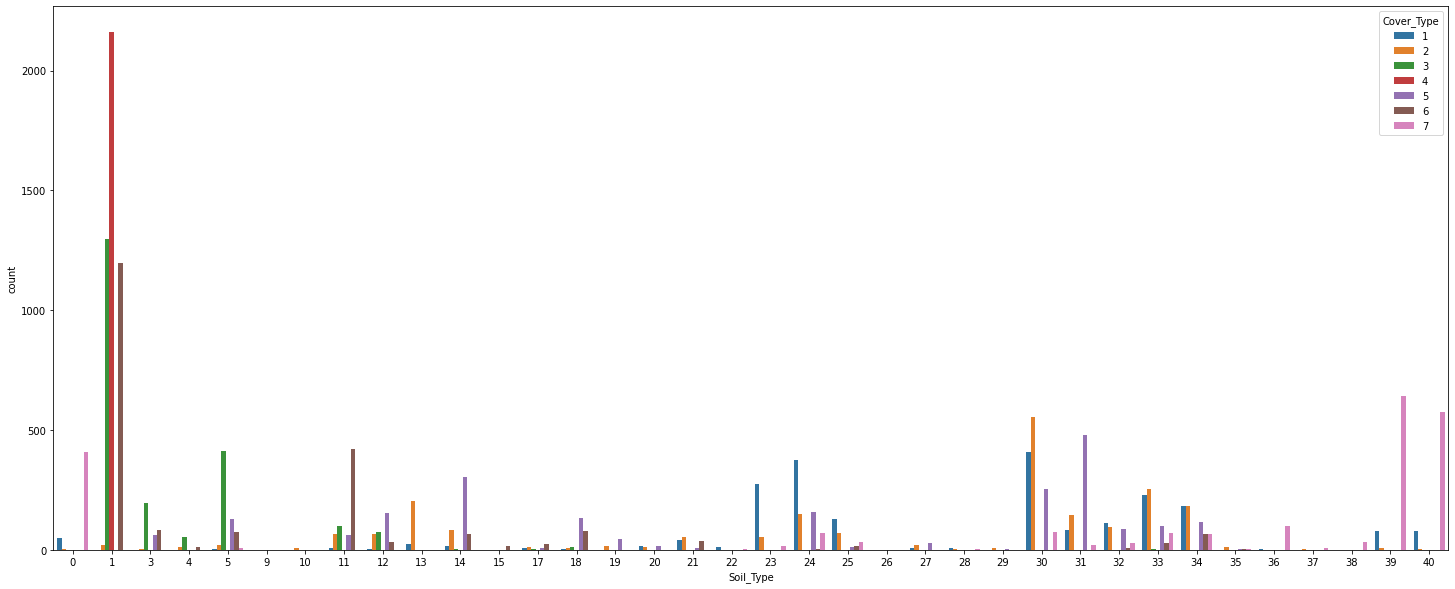

In [ ]:
# Group one-hot encoded variables of a category into one single variable

# names of all the columns
cols = df.columns

# number of rows=r , number of columns=c
r,c = df.shape

# Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

# Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w = 0;
    s = 0;
    # Category1 range
    for j in range(10,14):
        if (df.iloc[i,j] == 1):
            w = j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (df.iloc[i,k] == 1):
            s = k-13 #category class
            break
    # Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i] = [w,s,df.iloc[i,c-1]]

# Plot for Category1    
sn.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
# Plot for Category2
plt.rc("figure", figsize=(25, 10))
sn.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction. WildernessArea_3 has not much class distinction. SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high.

# **Baseline**

## Data Preparation for Baseline

In [18]:
# Exclude columns with no useful data for prediction
new_headers = [n for n in all_headers if n not in ['Id', 'Soil_Type7', 'Soil_Type15']]
df = df[new_headers]
print('data set shape:', df.shape)

Cover_Types = ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', 
               '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']

# df = shuffle(df)

# Train, dev, test split (70/20/10)
split1 = int(len(df)* 0.70)
split2 = int(split1 + (len(df) - split1) / 2*3)

train_data, train_labels = df[:split1].drop(columns=['Cover_Type']), df.Cover_Type[:split1]
dev_data, dev_labels     = df[split1:split2].drop(columns=['Cover_Type']), df.Cover_Type[split1:split2]
test_data, test_labels   = df[split2:].drop(columns=['Cover_Type']), df.Cover_Type[split2:]

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         Cover_Types)
print('number of features:',   len(train_data.columns))
print('feature names:\n',   list(train_data.columns))

data set shape: (15120, 53)
training label shape: (10584,)
dev label shape: (4536,)
test label shape: (0,)
labels names: ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']
number of features: 52
feature names:
 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil

## KNN

In [19]:
def knn_baseline():
  # create a list to store accuracies for each k
  accuracies = []
  k_values = [1,3,5,7,9,11,13,15,17,19]
  # Use KNeighborsClassifier to produce a k-nearest neighbor model
  for k in k_values:
      # Use KNeighborsClassifier to produce a k-nearest neighbor model
      knn = KNeighborsClassifier(n_neighbors=k)

      # Train the model using the mini training sets
      knn.fit(train_data, train_labels)
      
      predictions = knn.predict(dev_data)
      
      # test_predicted_labels = model.predict(test_data)
      # Evaluate the model and append to the list
      score = f1_score(dev_labels, predictions, average="weighted")

      print("k={}, f1-score = {:.2f}.".format(k, score * 100))
      accuracies.append(score)
  print("\nWhen k={}, the accuracy is best.".format(k_values[accuracies.index(max(accuracies))]))

  model_1 = KNeighborsClassifier(n_neighbors=k_values[accuracies.index(max(accuracies))])

  # Train the model using the training sets
  model_1.fit(train_data, train_labels)
  predictions = model_1.predict(dev_data)
  print("\nClassification report for k={}".format(k_values[accuracies.index(max(accuracies))]))
  print(classification_report(dev_labels, predictions))

knn_baseline()

k=1, f1-score = 71.49.
k=3, f1-score = 69.12.
k=5, f1-score = 68.23.
k=7, f1-score = 67.11.
k=9, f1-score = 66.24.
k=11, f1-score = 65.13.
k=13, f1-score = 63.75.
k=15, f1-score = 62.84.
k=17, f1-score = 62.38.
k=19, f1-score = 61.60.

When k=1, the accuracy is best.

Classification report for k=1
              precision    recall  f1-score   support

         1.0       0.70      0.65      0.67       575
         2.0       0.53      0.59      0.56       620
         3.0       0.71      0.54      0.61       898
         4.0       0.82      0.97      0.89       540
         5.0       0.73      0.96      0.83       546
         6.0       0.70      0.58      0.64       811
         7.0       0.89      0.97      0.93       546

    accuracy                           0.72      4536
   macro avg       0.73      0.75      0.73      4536
weighted avg       0.72      0.72      0.71      4536



Overall accuracy is as high as 0.71, however low accuracies for 2, 3 and 1.

## Logistic Regression

In [20]:
def lg_baseline():
  accuracies = []
  L2_strengths = [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]
  for c in L2_strengths:
      model = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
      model.fit(train_data, train_labels)
      test_predicted_labels = model.predict(dev_data)
      accuracies.append(model.score(dev_data, dev_labels))
      print('When L2 regularization strength is ' + str(c) + ', Logistic Regression Model accuracy: %3.2f f1_score: %3.2f' 
            %(model.score(dev_data, dev_labels), 
              f1_score(dev_labels, test_predicted_labels, average="weighted")))
  print("\nWhen L2 regularization is {}, the accuracy is best.".format(L2_strengths[accuracies.index(max(accuracies))]))

  # Train the model with the best L2 regularization strength
  model = LogisticRegression(C= L2_strengths[accuracies.index(max(accuracies))], solver="liblinear", multi_class="auto")
  model.fit(train_data, train_labels)
  test_predicted_labels = model.predict(dev_data)
  print("\nClassification report for L2 strength of ".format(L2_strengths[accuracies.index(max(accuracies))]))
  print(classification_report(dev_labels, test_predicted_labels))

lg_baseline()

When L2 regularization strength is 0.001, Logistic Regression Model accuracy: 0.54 f1_score: 0.52
When L2 regularization strength is 0.01, Logistic Regression Model accuracy: 0.57 f1_score: 0.55
When L2 regularization strength is 0.1, Logistic Regression Model accuracy: 0.60 f1_score: 0.59
When L2 regularization strength is 0.5, Logistic Regression Model accuracy: 0.60 f1_score: 0.59
When L2 regularization strength is 1, Logistic Regression Model accuracy: 0.60 f1_score: 0.59
When L2 regularization strength is 10, Logistic Regression Model accuracy: 0.61 f1_score: 0.60
When L2 regularization strength is 100, Logistic Regression Model accuracy: 0.59 f1_score: 0.59
When L2 regularization strength is 1000, Logistic Regression Model accuracy: 0.60 f1_score: 0.59

When L2 regularization is 10, the accuracy is best.

Classification report for L2 strength of 
              precision    recall  f1-score   support

         1.0       0.67      0.63      0.65       575
         2.0       0.61   

The overall average accuracy is only 0.59 for Logistic Regression. It's not performing very well in predicting class 3 and 5 in particular.

## Naive Bayes

In [22]:
def nb_baseline():
  gnb = GaussianNB()
  gnb.fit(train_data, train_labels)
  model_pred = gnb.predict(dev_data)
  acc_gnb = f1_score(dev_labels, model_pred, average="weighted")
  print("GaussianNB model accuracy using all features only:", acc_gnb)
  print(classification_report(dev_labels, model_pred))

  # Evaluate binary features and continuous features indepedently (Naive assumption means no correlation between features taken into account)
  # BernoulliNB (Binary features only)
  train_data_binary = train_data.iloc[:,10:]
  dev_data_binary = dev_data.iloc[:,10:]

  bnb = BernoulliNB(alpha=1)
  bnb.fit(train_data_binary, train_labels)
  model_pred = bnb.predict(dev_data_binary)
  acc_bnb = f1_score(dev_labels, model_pred, average="weighted")
  print("BernoulliNB model accuracy using binary features only:", acc_bnb)
  print(classification_report(dev_labels, model_pred))

  # GaussianNB (continuous features only)
  train_data_cont = train_data.iloc[:,:10]
  dev_data_cont = dev_data.iloc[:,:10]

  gnb = GaussianNB()
  gnb.fit(train_data_binary, train_labels)
  model_pred = gnb.predict(dev_data_binary)
  acc_gnb = f1_score(dev_labels, model_pred, average="weighted")
  print("GaussianNB model accuracy using continuous features only:", acc_gnb)
  print(classification_report(dev_labels, model_pred))
  
nb_baseline()

GaussianNB model accuracy using all features only: 0.5328469595262766
              precision    recall  f1-score   support

         1.0       0.52      0.73      0.61       575
         2.0       0.78      0.14      0.24       620
         3.0       0.47      0.81      0.60       898
         4.0       0.73      0.91      0.81       540
         5.0       0.54      0.77      0.64       546
         6.0       0.83      0.09      0.17       811
         7.0       0.86      0.84      0.85       546

    accuracy                           0.59      4536
   macro avg       0.68      0.61      0.56      4536
weighted avg       0.67      0.59      0.53      4536

BernoulliNB model accuracy using binary features only: 0.5055619235604445
              precision    recall  f1-score   support

         1.0       0.61      0.43      0.50       575
         2.0       0.49      0.44      0.47       620
         3.0       0.43      0.10      0.16       898
         4.0       0.70      0.84      0.7

Overall accuracy for Bernoulli is 50% and Gaussian is 36%. Worst performing class for binary features alone is class 3 while continous features performed worst for class 2 and 6.

## Decision Tree

In [23]:
def dt_baseline():
  clf = tree.DecisionTreeClassifier(criterion="entropy")
  model = clf.fit(train_data, train_labels)
  tree_predict = model.predict(dev_data)

  dt_score = f1_score(dev_labels, tree_predict, average="weighted")
  print(dt_score)
  print(classification_report(dev_labels, tree_predict))

dt_baseline()

0.7323548926044512
              precision    recall  f1-score   support

         1.0       0.66      0.62      0.64       575
         2.0       0.59      0.56      0.58       620
         3.0       0.71      0.64      0.67       898
         4.0       0.87      0.92      0.89       540
         5.0       0.80      0.88      0.84       546
         6.0       0.67      0.69      0.68       811
         7.0       0.89      0.95      0.92       546

    accuracy                           0.74      4536
   macro avg       0.74      0.75      0.75      4536
weighted avg       0.73      0.74      0.73      4536



# **Preprocessing**

In [67]:
# Exclude columns with no useful data for prediction
# new_headers = [n for n in all_headers if n not in ['Id', 'Soil_Type7', 'Soil_Type15']]
# df = df[new_headers]

# Extract only the values
array = df.values

# Shuffle data
random.shuffle(array)

# Y = target column, X = features
X = array[:,0:-1]
Y = array[:,-1]

In [68]:
# list to hold all dfs' from various transformations
df_all = []

# No transformations, append ['type_of_transformation', array]
df_all.append(['Orig',X])

# Standardized
# Apply transform only for non-categorical data
df_temp = StandardScaler().fit_transform(X[:,0:10])
#Concatenate non-categorical data and categorical
df_con = np.concatenate((df_temp,X[:,10:]),axis=1)
#Add this version of df to the list 
df_all.append(['StdScaler',df_con])

# MinMax
#Apply transform only for non-categorical data
df_temp = MinMaxScaler().fit_transform(X[:,0:10])
#Concatenate non-categorical data and categorical
df_con = np.concatenate((df_temp,X[:,10:]),axis=1)
#Add this version of df to the list 
df_all.append(['MinMax',df_con])

# Normalize
#Apply transform only for non-categorical data
df_temp = Normalizer().fit_transform(X[:,0:10])
#Concatenate non-categorical data and categorical
df_con = np.concatenate((df_temp,X[:,10:]),axis=1)
#Add this version of df to the list 
df_all.append(['Normalizer',df_con])

##### Add more transformations in this section. Follow similar format as previous. #####

In [69]:
# Sets of train/dev/test with various preprocessing
# TrainDevTest_Sets first level index: 0(no transform), 1(standard scaler), 2(minmax), 3(normalize)
# TrainDevTest_Sets second level index: 0(name of transform), 1(train data), 2(train labels), 3(dev data), 4(dev labels), 5(test data), 6(test labels)
TrainDevTest_Sets = []

# Train, dev, test split (70/20/10)
split1 = int(len(df)* 0.70)
split2 = int(split1 + (len(df) - split1) * 2 / 3)


for X_array in df_all:
    train_data, train_labels = X_array[1][:split1,:], Y[:split1]
    dev_data, dev_labels     = X_array[1][split1:split2,:], Y[split1:split2]
    test_data, test_labels   = X_array[1][split2:,:], Y[split2:]
    TrainDevTest_Sets.append([X_array[0], train_data, train_labels, dev_data, dev_labels, test_data, test_labels])

print('training shape:',       TrainDevTest_Sets[0][1].shape)
print('dev shape:',            TrainDevTest_Sets[0][3].shape)
print('test shape:',           TrainDevTest_Sets[0][5].shape)
print('labels names:',         label_name)
print('number of features:',   TrainDevTest_Sets[0][1].shape[1])

training shape: (10584, 52)
dev shape: (3024, 52)
test shape: (1512, 52)
labels names: {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
number of features: 52


# **Feature Selection**

In [60]:
def FindFeatureRank_ET(X, Y, sel, name):
    sel.fit(X, Y)
    # Numeric weight of importance (greater value = higher importance)
    importances = sel.feature_importances_
    idx = np.arange(0, train_data.shape[1])
    feature_importance = sel.feature_importances_.tolist()
    features_to_keep = idx[importances > np.mean(importances)] 
    #features_to_keep = importances > np.mean(importances)
    seq = sorted(feature_importance, reverse=True)
    # Rank of each feature, maintain ordering of array
    rank = [seq.index(v) for v in feature_importance]
    # Chosen feature names (importance above mean)
    selected_feature = df.iloc[:,:-1].columns[features_to_keep]
    
    return [name, rank, selected_feature, features_to_keep]

In [61]:
def FindFeatureRank_EDA(X, Y, name):
    # sel.fit(X, Y)
    # Numeric weight of importance (greater value = higher importance)
    
    # feature_importance = sel.feature_importances_.tolist()
    features_to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 33, 34, 40, 41, 42, 43, 44, 46, 49, 50, 51]
    # features_to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13] 
    #features_to_keep = importances > np.mean(importances)
    #seq = sorted(feature_importance, reverse=True)
    # Rank of each feature, maintain ordering of array
    # rank = [seq.index(v) for v in feature_importance]
    rank = []
    # Chosen feature names (importance above mean)
    selected_feature = df.iloc[:,:-1].columns[features_to_keep]
    
    return [name, rank, selected_feature, features_to_keep]

In [62]:
# Function to find the rank of features based on training data and feature selection method

def FindFeatureRank(X, Y, sel, name):
    sel.fit(X, Y)
    # Numeric weight of importance (greater value = higher importance)
    feature_importance = sel.estimator_.feature_importances_.tolist()
    seq = sorted(feature_importance, reverse=True)
    # Rank of each feature, maintain ordering of array
    rank = [seq.index(v) for v in feature_importance]
    # Chosen feature names (importance above mean)
    selected_feature = df.iloc[:,:-1].columns[sel.get_support()]
    
    return [name, rank, selected_feature, sel.get_support()]

# Empty array to append to for each feature selection
MethodRankSelected = []

## L1 and L2 Regularization 

In [30]:
def L1_L2_Regularization(train_data, train_labels, dev_data, dev_labels):
  # Now use L1 regularization
  L1_regularization_strength = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
  accuracies = []

  for c in L1_regularization_strength:
      # Produce a Logistic Regression model using the L1 regularization strength
      model_L1_regularization = LogisticRegression(solver="saga", multi_class="auto", penalty="l1", C=c, tol=0.015)
      model_L1_regularization.fit(train_data, train_labels)

      # Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.
      old_features = np.array(df.iloc[:,:-1].columns)
      new_features = old_features[model_L1_regularization.coef_.sum(axis = 0) != 0]
      new_features_boolean = [x in new_features for x in old_features]

      model = LogisticRegression(C=100, solver="liblinear", multi_class="auto", penalty="l2")
      model.fit(train_data[:, new_features_boolean], train_labels)
      test_predicted_labels = model.predict(dev_data[:, new_features_boolean])
      accuracies.append(model.score(dev_data[:, new_features_boolean], dev_labels))
      # print('When L1 regularization strength is ' + str(c) + ', Logistic Regression Model accuracy: %3.2f f1_score: %3.2f' 
      #       %(model.score(dev_data[new_features], dev_labels), 
      #         f1_score(dev_labels, test_predicted_labels, average="weighted")))
      
  print("\nWhen L1 regularization is {}, the accuracy is best.".format(L1_regularization_strength[accuracies.index(max(accuracies))]))

  # Train the model with the best L1 regularization strength
  model_L1_regularization = LogisticRegression(solver="saga", multi_class="auto", penalty="l1", C=L1_regularization_strength[accuracies.index(max(accuracies))], tol=0.015)
  model_L1_regularization.fit(train_data, train_labels)

  # Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.
  old_features = np.array(df.iloc[:,:-1].columns)
  new_features = old_features[model_L1_regularization.coef_.sum(axis = 0) != 0]
  new_features_boolean = [x in new_features for x in old_features]
  return new_features_boolean

TrainDevTest_Sets_L1_L2 = []

for n in TrainDevTest_Sets:
    train_data, train_labels = n[1], n[2]
    dev_data, dev_labels     = n[3], n[4]
    new_features = L1_L2_Regularization(train_data, train_labels, dev_data, dev_labels)
    train_data, train_labels = n[1][:, new_features], n[2]
    dev_data, dev_labels     = n[3][:, new_features], n[4]
    test_data, test_labels   = n[5][:, new_features], n[6]
    
    TrainDevTest_Sets_L1_L2.append([n[0] + " L1 and L2 regularization", train_data, train_labels, dev_data, dev_labels, test_data, test_labels])   


When L1 regularization is 0.5, the accuracy is best.

When L1 regularization is 0.1, the accuracy is best.

When L1 regularization is 0.5, the accuracy is best.

When L1 regularization is 1, the accuracy is best.


## ExtraTreeClassifier

In [70]:
# ExtraTreesClassifier
TrainDevTest_Sets_ET = []

for n in TrainDevTest_Sets:
  train_data, train_labels = n[1], n[2]
  sel = ExtraTreesClassifier(n_estimators=52)
  sel = sel.fit(train_data, train_labels)
  selected = FindFeatureRank_ET(train_data, train_labels, sel, n[0] + " ET")

  # importances = sel.feature_importances_
  # idx = np.arange(0, train_data.shape[1])
  # features_to_keep = idx[importances > np.mean(importances)]
  # selected = train_data.columns[features_to_keep]
  MethodRankSelected.append(selected)

  train_data, train_labels = n[1][:, selected[3]], n[2]
  dev_data, dev_labels     = n[3][:, selected[3]], n[4]
  test_data, test_labels   = n[5][:, selected[3]], n[6]
    
  TrainDevTest_Sets_ET.append([selected[0], train_data, train_labels, dev_data, dev_labels, test_data, test_labels])
  # importances = sel.feature_importances_

  # idx = np.arange(0, train_data.shape[1])

  # selectd = idx[importances > np.mean(importances)] 

  # # print features we selected from ExtraTreeClassifier
  # print(train_data.columns[features_to_keep])

## RandomForestClassifier

In [71]:
# Random Forest Classifier
# Add rank and info for each transformation type for RF classifier. 
# Then create new datsets based on selected features
TrainDevTest_Sets_RF = []

for n in TrainDevTest_Sets:
    train_data, train_labels = n[1], n[2]
    sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
    selected = FindFeatureRank(train_data, train_labels, sel, n[0] + " RF")
    MethodRankSelected.append(selected)
    
    train_data, train_labels = n[1][:, selected[3]], n[2]
    dev_data, dev_labels     = n[3][:, selected[3]], n[4]
    test_data, test_labels   = n[5][:, selected[3]], n[6]
    
    TrainDevTest_Sets_RF.append([selected[0], train_data, train_labels, dev_data, dev_labels, test_data, test_labels])

## Recursive Feature Elimination with RandomForestClassifier

Sklearn provides RFE for recursive feature elimination and RFECV for finding the ranks together with optimal number of features via a cross validation loop.

Optimal number of features : 26


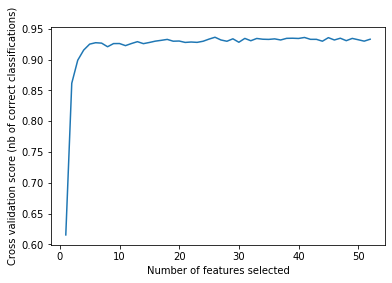

In [33]:
# Create the RFE object and compute a cross-validated score.
rfc = RandomForestClassifier(random_state=101)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(TrainDevTest_Sets[0][1], TrainDevTest_Sets[0][2])

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

The optimal number of features is >20. However, from plot, we see the increase in accuracy from 10-20 features not significant. Therefore, choose to select 15 and use RFE (a greedy optimization) for finding the best performing subset of 15 features



In [72]:
# Recursive Feature Elimination
# Add rank and info for each transformation type for RFE classifier

TrainDevTest_Sets_RFE = []

for n in TrainDevTest_Sets:
    train_data, train_labels = n[1], n[2]
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=15)
    selected = FindFeatureRank(train_data, train_labels, sel, n[0] + " RFE")
    # MethodRankSelected.append(selected)
    
    train_data, train_labels = n[1][:, selected[3]], n[2]
    dev_data, dev_labels     = n[3][:, selected[3]], n[4]
    test_data, test_labels   = n[5][:, selected[3]], n[6]
    
    TrainDevTest_Sets_RFE.append([selected[0], train_data, train_labels, dev_data, dev_labels, test_data, test_labels])   

## Recursive Feature Elimination with Logistic Classifier

In [35]:
TrainDevTest_Sets_RFE_LR = []

for n in TrainDevTest_Sets:
    train_data, train_labels = n[1], n[2]
    sel = RFE(LogisticRegression(solver="liblinear", multi_class="auto"), n_features_to_select=15)
    sel.fit(train_data, train_labels)
    train_data, train_labels = n[1][:, list(sel.support_)], n[2]
    dev_data, dev_labels     = n[3][:, list(sel.support_)], n[4]
    test_data, test_labels   = n[5][:, list(sel.support_)], n[6]
    
    TrainDevTest_Sets_RFE_LR.append([n[0] + " RFE with logistic classifier", train_data, train_labels, dev_data, dev_labels, test_data, test_labels])   

## Manual Selection from EDA

In [36]:
TrainDevTest_Sets_EDA = []

for n  in TrainDevTest_Sets:
    train_data, train_labels = n[1], n[2]
    # sel = RFE(RandomForestClassifier(n_estimators=52, random_state=0, n_jobs=-1), n_features_to_select=15)
    selected = FindFeatureRank_EDA(train_data, train_labels, n[0] + " EDA")
    # MethodRankSelected.append(selected)
    
    train_data, train_labels = n[1][:, selected[3]], n[2]
    dev_data, dev_labels     = n[3][:, selected[3]], n[4]
    test_data, test_labels   = n[5][:, selected[3]], n[6]
    
    TrainDevTest_Sets_EDA.append([selected[0], train_data, train_labels, dev_data, dev_labels, test_data, test_labels])   

## Feature Importance Ranking

In [37]:
rank = sum([np.array(i[1]) for i in MethodRankSelected])/len(MethodRankSelected)
rank = rank.tolist()
names = df.iloc[:,:-1].columns.to_list()
df_feature_ranks = pd.DataFrame({"Mean of Importance Rank":rank, "Feature Names":names})
df_feature_ranks.sort_values(by="Mean of Importance Rank", ascending=True)

,Mean of Importance Rank,Feature Names
0,0.125,Elevation
5,0.875,Horizontal_Distance_To_Roadways
9,2.500,Horizontal_Distance_To_Fire_Points
6,4.000,Hillshade_9am
13,4.250,Wilderness_Area4
3,4.500,Horizontal_Distance_To_Hydrology
1,6.750,Aspect
7,6.875,Hillshade_Noon
4,8.000,Vertical_Distance_To_Hydrology
8,8.000,Hillshade_3pm


# **Models**

In [38]:
# This is a function that can be used to display f1_scores from each model
def plot_f1_score(model_name, f1_score_list):
  print(model_name, '\n')
  f1_scores_df = pd.DataFrame(data = np.array(f1_score_list).reshape((int(len(f1_score_list)/5)), 5), columns=['Feature selection Method', 'Original', 'StdScaler', 'MinMax', 'Normalizer'])
  f1_scores_df.set_index('Feature selection Method', inplace=True, drop=True)
  return f1_scores_df.apply(pd.to_numeric).style.background_gradient(cmap='Blues', low=0, high = 1).set_precision(2)

## KNN

In [39]:
# search for an optimal value of K for KNN
k_range = [1,3,5,9]

# list of scores from k_range


def KNN(x_train, x_dev, y_train, y_dev): 
    f1_scores = []
    
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        model_pred = model.predict(x_dev)
#         for i in range(1,8):
#             print(i, model_pred.tolist().count(i))
        score = f1_score(y_dev, model_pred, average="weighted")
        f1_scores.append(score)
    print("The f1 score for KNN range {} is {}".format(k_range, f1_scores))    
    return f1_scores

In [40]:
# Without feature selection:
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    KNN(i[1], i[3], i[2], i[4])

# With RF feature selection:
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    KNN(i[1], i[3], i[2], i[4])

# With RFE feature selection
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    KNN(i[1], i[3], i[2], i[4])

# With ExtraTreeClassifier feature selection
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    KNN(i[1], i[3], i[2], i[4])

# With EDA feature selection
for i in TrainDevTest_Sets_EDA:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    KNN(i[1], i[3], i[2], i[4])

No feature selection and transformation: Orig
The f1 score for KNN range [1, 3, 5, 9] is [0.8333447813266927, 0.7791792078539247, 0.7373969916509034, 0.6848760624087151]
No feature selection and transformation: StdScaler
The f1 score for KNN range [1, 3, 5, 9] is [0.8241987394405821, 0.7786518943425846, 0.739711318581969, 0.6948735028395545]
No feature selection and transformation: MinMax
The f1 score for KNN range [1, 3, 5, 9] is [0.8416920048603787, 0.7816668247018592, 0.7480565618737159, 0.7182395764046848]
No feature selection and transformation: Normalizer
The f1 score for KNN range [1, 3, 5, 9] is [0.8383168212138641, 0.7868713551514194, 0.7537170660785414, 0.723915657786937]
With RF feature selection and transformation: Orig RF
The f1 score for KNN range [1, 3, 5, 9] is [0.8333447813266927, 0.7791792078539247, 0.7373969916509034, 0.6848760624087151]
With RF feature selection and transformation: StdScaler RF
The f1 score for KNN range [1, 3, 5, 9] is [0.7935350483330565, 0.734933

k-Nearest Neighbors improved by shuffling the data.

## Logistic Regression

In [41]:
def LR_model(x_train, x_dev, y_train, y_dev):
    accuracies = []
    f1_scores = []
    model = LogisticRegression(C=100, solver='liblinear', multi_class="auto", penalty="l2", random_state = 1234)
    model.fit(x_train, y_train)
    test_predicted_labels = model.predict(x_dev)
    print('When C=' + str(100) + ', Logistic Regression Model accuracy: %3.2f f1_score: %3.2f' 
          %(model.score(x_dev, y_dev), 
            f1_score(y_dev, test_predicted_labels, average="weighted")))
    return f1_score(y_dev, test_predicted_labels, average="weighted")
    

In [42]:
f1_scores_LR = []
# Without feature selection:
f1_scores_LR.append('No feature selection and transformation')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    # LR_model(i[1], i[3], i[2], i[4])
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

print('\n')
# With ExtraTreeClassifier feature selection
f1_scores_LR.append('With ET feature selection and transformation')
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

print('\n')
# With L1 and L2 Regularization
f1_scores_LR.append('With L1 and L2 feature selection and transformation')
for i in TrainDevTest_Sets_L1_L2:
    print("With L1 and L2 feature selection and transformation: {}".format(i[0]))
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RF feature selection:
f1_scores_LR.append('With RF feature selection and transformation')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RFE feature selection
f1_scores_LR.append('With RFE feature selection and transformation')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RFE with Logistic Classifier feature selection
f1_scores_LR.append('With RFE with Logistic Classifier feature selection and transformation')
for i in TrainDevTest_Sets_RFE_LR:
    print("With RFE with Logistic Classifier feature selection and transformation: {}".format(i[0]))
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

print('\n')
# With EDA feature selection
f1_scores_LR.append('With EDA feature selection and transformation')
for i in TrainDevTest_Sets_EDA:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    f1_scores_LR.append(LR_model(i[1], i[3], i[2], i[4]))

# plot out all F1 scores
plot_f1_score('Logistic Regression', f1_scores_LR)

No feature selection and transformation: Orig
When C=100, Logistic Regression Model accuracy: 0.63 f1_score: 0.62
No feature selection and transformation: StdScaler
When C=100, Logistic Regression Model accuracy: 0.63 f1_score: 0.62
No feature selection and transformation: MinMax
When C=100, Logistic Regression Model accuracy: 0.63 f1_score: 0.62
No feature selection and transformation: Normalizer
When C=100, Logistic Regression Model accuracy: 0.61 f1_score: 0.60


With ET feature selection and transformation: Orig ET
When C=100, Logistic Regression Model accuracy: 0.59 f1_score: 0.58
With ET feature selection and transformation: StdScaler ET
When C=100, Logistic Regression Model accuracy: 0.59 f1_score: 0.58
With ET feature selection and transformation: MinMax ET
When C=100, Logistic Regression Model accuracy: 0.59 f1_score: 0.57
With ET feature selection and transformation: Normalizer ET
When C=100, Logistic Regression Model accuracy: 0.51 f1_score: 0.49


With L1 and L2 feature sel

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection and transformation,0.62,0.62,0.62,0.6
With ET feature selection and transformation,0.58,0.58,0.57,0.49
With L1 and L2 feature selection and transformation,0.61,0.62,0.62,0.6
With RF feature selection and transformation,0.54,0.56,0.56,0.46
With RFE feature selection and transformation,0.56,0.58,0.57,0.48
With RFE with Logistic Classifier feature selection and transformation,0.48,0.55,0.57,0.53
With EDA feature selection and transformation,0.6,0.62,0.61,0.59


## Naive Bayes

In [43]:
def GNB(x_train, x_dev, y_train, y_dev):
    gnb = GaussianNB(var_smoothing=0.1) 
    gnb.fit(x_train, y_train)
    model_pred = gnb.predict(x_dev)
    for i in range(1,8):
        print("Type: '{}'    Total Count: {}".format(i, model_pred.tolist().count(i)))
    gnb_acc = f1_score(y_dev, model_pred, average="weighted")
    print("The f1 score for RF is {}".format(gnb_acc))
    return gnb_acc

In [44]:
f1_scores_NB = []
# Without feature selection:
f1_scores_NB.append('No feature selection')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    f1_scores_NB.append(GNB(i[1], i[3], i[2], i[4]))

# With RF feature selection:
f1_scores_NB.append('With RF feature selection')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_NB.append(GNB(i[1], i[3], i[2], i[4]))

# With RFE feature selection
f1_scores_NB.append('With RFE feature selection')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_NB.append(GNB(i[1], i[3], i[2], i[4]))

# plot out all F1 scores
plot_f1_score('Naive Bayes', f1_scores_NB)

No feature selection and transformation: Orig
Type: '1'    Total Count: 146
Type: '2'    Total Count: 624
Type: '3'    Total Count: 20
Type: '4'    Total Count: 1402
Type: '5'    Total Count: 715
Type: '6'    Total Count: 115
Type: '7'    Total Count: 2
The f1 score for RF is 0.2119142349116591
No feature selection and transformation: StdScaler
Type: '1'    Total Count: 323
Type: '2'    Total Count: 328
Type: '3'    Total Count: 348
Type: '4'    Total Count: 579
Type: '5'    Total Count: 628
Type: '6'    Total Count: 315
Type: '7'    Total Count: 503
The f1 score for RF is 0.5730677640812514
No feature selection and transformation: MinMax
Type: '1'    Total Count: 251
Type: '2'    Total Count: 345
Type: '3'    Total Count: 498
Type: '4'    Total Count: 503
Type: '5'    Total Count: 540
Type: '6'    Total Count: 437
Type: '7'    Total Count: 450
The f1 score for RF is 0.5837801578173951
No feature selection and transformation: Normalizer
Type: '1'    Total Count: 259
Type: '2'    Total 

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.21,0.57,0.58,0.53
With RF feature selection,0.21,0.51,0.46,0.32
With RFE feature selection,0.21,0.52,0.49,0.34


Naive Bayes did not improve much with various transformations and feature selection. Highest accuracy still around 50-60%. Without transformations the prediction is absent for several classes.

## Decision Tree

In [45]:
def dt(x_train, x_dev, y_train, y_dev):
  clf = tree.DecisionTreeClassifier(criterion="entropy")
  model = clf.fit(x_train, y_train)
  tree_predict = model.predict(x_dev)

  dt_score = f1_score(y_dev, tree_predict, average="weighted")
  print(dt_score)
  return dt_score
  # print(classification_report(dev_labels, tree_predict))

In [46]:
f1_scores_DT = []
# Without feature selection:
f1_scores_DT.append('No feature selection')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    f1_scores_DT.append(dt(i[1], i[3], i[2], i[4]))

# With RF feature selection:
f1_scores_DT.append('With RF feature selection')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_DT.append(dt(i[1], i[3], i[2], i[4]))

# With RFE feature selection
f1_scores_DT.append('With RFE feature selection')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_DT.append(dt(i[1], i[3], i[2], i[4]))

# With ExtraTreeClassifier feature selection
f1_scores_DT.append('With ET feature selection')
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    f1_scores_DT.append(dt(i[1], i[3], i[2], i[4]))

# With EDA feature selection
f1_scores_DT.append('With EDA feature selection')
for i in TrainDevTest_Sets_EDA:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    f1_scores_DT.append(dt(i[1], i[3], i[2], i[4]))

# plot out all F1 scores
plot_f1_score('Decision Tree', f1_scores_DT)

No feature selection and transformation: Orig
0.8168839241301388
No feature selection and transformation: StdScaler
0.8155839878219637
No feature selection and transformation: MinMax
0.8179339153037026
No feature selection and transformation: Normalizer
0.7801842362827673
With RF feature selection and transformation: Orig RF
0.8162173475500863
With RF feature selection and transformation: StdScaler RF
0.8120247236962002
With RF feature selection and transformation: MinMax RF
0.8195799591597125
With RF feature selection and transformation: Normalizer RF
0.7682447595039884
With RFE feature selection and transformation: Orig RFE
0.8114147217542756
With RFE feature selection and transformation: StdScaler RFE
0.8157941904188505
With RFE feature selection and transformation: MinMax RFE
0.8113434429445503
With RFE feature selection and transformation: Normalizer RFE
0.7678317837298445
With ET feature selection and transformation: Orig ET
0.8168336845238154
With ET feature selection and transf

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.82,0.82,0.82,0.78
With RF feature selection,0.82,0.81,0.82,0.77
With RFE feature selection,0.81,0.82,0.81,0.77
With ET feature selection,0.82,0.82,0.81,0.77
With EDA feature selection,0.81,0.81,0.81,0.78


The accuracy improved overall and is especially good when we used RF feature selection.

## Random Forest

In [47]:
def RandomForest(x_train, x_dev, y_train, y_dev):
    rf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
    rf.fit(x_train, y_train)
    model_pred = rf.predict(x_dev)
#     for i in range(1,8):
#         print(i, model_pred.tolist().count(i))
    rf_acc = f1_score(y_dev, model_pred, average="weighted")
    # print(classification_report(y_dev, model_pred))
    print("The f1 score for RF is {}".format(rf_acc))
    return rf_acc

In [48]:
f1_scores_RF = []
# Without feature selection:
f1_scores_RF.append('No feature selection')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    f1_scores_RF.append(RandomForest(i[1], i[3], i[2], i[4]))

# With RF feature selection:
f1_scores_RF.append('With RF feature selection')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_RF.append(RandomForest(i[1], i[3], i[2], i[4]))

# With RFE feature selection
f1_scores_RF.append('With RFE feature selection')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_RF.append(RandomForest(i[1], i[3], i[2], i[4]))

# With ExtraTreeClassifier feature selection
f1_scores_RF.append('With ET feature selection')
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    f1_scores_RF.append(RandomForest(i[1], i[3], i[2], i[4]))

# With ExtraTreeClassifier feature selection
f1_scores_RF.append('With EDA feature selection')
for i in TrainDevTest_Sets_EDA:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    f1_scores_RF.append(RandomForest(i[1], i[3], i[2], i[4]))

# plot out all F1 scores
plot_f1_score('Random Forest', f1_scores_RF)

No feature selection and transformation: Orig
The f1 score for RF is 0.8664716771758396
No feature selection and transformation: StdScaler
The f1 score for RF is 0.8678192138568778
No feature selection and transformation: MinMax
The f1 score for RF is 0.8674817067280916
No feature selection and transformation: Normalizer
The f1 score for RF is 0.8503095012940262
With RF feature selection and transformation: Orig RF
The f1 score for RF is 0.8658488525379957
With RF feature selection and transformation: StdScaler RF
The f1 score for RF is 0.8655647796819141
With RF feature selection and transformation: MinMax RF
The f1 score for RF is 0.8658605170145074
With RF feature selection and transformation: Normalizer RF
The f1 score for RF is 0.8264703158353769
With RFE feature selection and transformation: Orig RFE
The f1 score for RF is 0.8635366562384068
With RFE feature selection and transformation: StdScaler RFE
The f1 score for RF is 0.863593527298778
With RFE feature selection and transfo

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.87,0.87,0.87,0.85
With RF feature selection,0.87,0.87,0.87,0.83
With RFE feature selection,0.86,0.86,0.86,0.82
With ET feature selection,0.87,0.87,0.87,0.82
With EDA feature selection,0.87,0.87,0.87,0.84


## Neural Net

Single Layer

In [49]:
def binarizeY(data):
    binarized_data = np.zeros((data.size,7))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i-1]=1
    return binarized_data

def NN_model(x_train, x_dev, y_train, y_dev):
  train_labels_b = binarizeY(y_train)
  dev_labels_b = binarizeY(y_dev)
  numClasses = train_labels_b[1].size
  numFeatures = x_train.shape[1]
  ## (1) Parameters
  w = theano.shared(np.asarray((np.random.randn(*(numFeatures, numClasses))*.01)))

  ## (2) Model
  X = T.matrix()
  Y = T.matrix()
  def model(X, w):
      return T.nnet.softmax(T.dot(X, w))
  y_hat = model(X, w)

  ## (3) Cost
  cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y))

  ## (4) Objective
  alpha = 0.01
  gradient = T.grad(cost=cost, wrt=w)
  update = [[w, w - gradient * alpha]] 
  train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) 
  y_pred = T.argmax(y_hat, axis=1) 
  predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

  miniBatchSize = 1 
  epochs = 50     
  for start, end in zip(range(0, len(x_train), miniBatchSize), range(miniBatchSize, len(x_train), miniBatchSize)):
      cost = train(x_train[start:end], train_labels_b[start:end])
  print('When there are 50 epochos, accuracy = %.2f, f1 score = %.2f' %(np.mean(np.argmax(dev_labels_b, axis=1) == predict(x_dev)), 
                                                                        f1_score(np.argmax(dev_labels_b, axis=1), predict(x_dev), average="weighted")))
  return f1_score(np.argmax(dev_labels_b, axis=1), predict(x_dev), average="weighted")

In [50]:
f1_scores_NN_single = []
# Without feature selection:
f1_scores_NN_single.append('No feature selection')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

print('\n')
# With ExtraTreeClassifier feature selection
f1_scores_NN_single.append('With ExtraTreeClassifier feature selection')
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

print('\n')
# With L1 and L2 Regularization
f1_scores_NN_single.append('With L1 and L2 Regularization')
for i in TrainDevTest_Sets_L1_L2:
    print("With L1 and L2 feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RF feature selection:
f1_scores_NN_single.append('With RF feature selection')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RFE feature selection
f1_scores_NN_single.append('With RFE feature selection')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RFE with Logistic Classifier feature selection
f1_scores_NN_single.append('With RFE with Logistic Classifier feature selection')
for i in TrainDevTest_Sets_RFE_LR:
    print("With RFE with Logistic Classifier feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

print('\n')
# With EDA feature selection
f1_scores_NN_single.append('With EDA feature selection')
for i in TrainDevTest_Sets_EDA:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_single.append(NN_model(i[1], i[3], i[2], i[4]))

# plot out all F1 scores
plot_f1_score('Single Layer Neural Network', f1_scores_NN_single)

No feature selection and transformation: Orig
When there are 50 epochos, accuracy = 0.30, f1 score = 0.23
No feature selection and transformation: StdScaler
When there are 50 epochos, accuracy = 0.60, f1 score = 0.58
No feature selection and transformation: MinMax
When there are 50 epochos, accuracy = 0.54, f1 score = 0.51
No feature selection and transformation: Normalizer
When there are 50 epochos, accuracy = 0.55, f1 score = 0.52


With ET feature selection and transformation: Orig ET
When there are 50 epochos, accuracy = 0.21, f1 score = 0.14
With ET feature selection and transformation: StdScaler ET
When there are 50 epochos, accuracy = 0.53, f1 score = 0.52
With ET feature selection and transformation: MinMax ET
When there are 50 epochos, accuracy = 0.44, f1 score = 0.36
With ET feature selection and transformation: Normalizer ET
When there are 50 epochos, accuracy = 0.42, f1 score = 0.36


With L1 and L2 feature selection and transformation: Orig L1 and L2 regularization
When th

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.23,0.58,0.51,0.52
With ExtraTreeClassifier feature selection,0.14,0.52,0.36,0.36
With L1 and L2 Regularization,0.14,0.58,0.51,0.52
With RF feature selection,0.27,0.5,0.31,0.23
With RFE feature selection,0.12,0.55,0.36,0.33
With RFE with Logistic Classifier feature selection,0.44,0.52,0.43,0.41
With EDA feature selection,0.19,0.56,0.51,0.51


Multi Layer Neural Network

In [51]:
def binarizeY(data):
    binarized_data = np.zeros((data.size,7))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i-1]=1
    return binarized_data

def NN_multi_model(x_train, x_dev, y_train, y_dev):
  train_labels_b = binarizeY(y_train)
  dev_labels_b = binarizeY(y_dev)
  numClasses = train_labels_b[1].size
  numFeatures = x_train.shape[1]
  ## (1) Parameters
  numHiddenNodes = 100
  w_1 = theano.shared(np.asarray((np.random.randn(*(numFeatures, numHiddenNodes))*.01)))
  w_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, numClasses))*.01)))
  params = [w_1, w_2]

  ## (2) Model
  X = T.matrix()
  Y = T.matrix()
  # Two notes:
  # First, feed forward is the composition of layers (dot product + activation function)
  # Second, activation on the hidden layer still uses sigmoid
  def model(X, w_1, w_2):
      return T.nnet.softmax(T.dot(T.nnet.sigmoid(T.dot(X, w_1)), w_2))
  y_hat = model(X, w_1, w_2)


  ## (3) Cost...same as logistic regression
  cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y))

  ## (4) Minimization.  Update rule changes to backpropagation.
  alpha = 0.01
  def backprop(cost, w):
      grads = T.grad(cost=cost, wrt=w)
      updates = []
      for w1, grad in zip(w, grads):
          updates.append([w1, w1 - grad * alpha])
      return updates
  update = backprop(cost, params)
  train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
  y_pred = T.argmax(y_hat, axis=1)
  predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

  miniBatchSize = 1 
  def gradientDescentStochastic(epochs):
    for i in range(epochs):
        for start, end in zip(range(0, len(x_train), miniBatchSize), range(miniBatchSize, len(x_train), miniBatchSize)):
            cost = train(x_train[start:end], train_labels_b[start:end])
  gradientDescentStochastic(50)
  print('When there are 50 epochos, accuracy = %.2f, f1 score = %.2f' %(np.mean(np.argmax(dev_labels_b, axis=1) == predict(x_dev)), f1_score(np.argmax(dev_labels_b, axis=1), predict(x_dev), average="weighted")))
  # print(classification_report(np.argmax(dev_labels_b, axis=1), predict(x_dev)))
  return f1_score(np.argmax(dev_labels_b, axis=1), predict(x_dev), average="weighted")


In [52]:
f1_scores_NN_multi = []
# Without feature selection:
f1_scores_NN_multi.append('No feature selection')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

print('\n')
# With ExtraTreeClassifier feature selection
f1_scores_NN_multi.append('With ExtraTreeClassifier feature selection')
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

print('\n')
# With L1 and L2 Regularization
f1_scores_NN_multi.append('With L1 and L2 Regularization')
for i in TrainDevTest_Sets_L1_L2:
    print("With L1 and L2 feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RF feature selection:
f1_scores_NN_multi.append('With RF feature selection')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RFE feature selection
f1_scores_NN_multi.append('With RFE feature selection')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

print('\n')
# With RFE with Logistic Classifier feature selection
f1_scores_NN_multi.append('With RFE with Logistic Classifier feature selection')
for i in TrainDevTest_Sets_RFE_LR:
    print("With RFE with Logistic Classifier feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

print('\n')
# With EDA feature selection
f1_scores_NN_multi.append('With EDA feature selection')
for i in TrainDevTest_Sets_EDA:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    f1_scores_NN_multi.append(NN_multi_model(i[1], i[3], i[2], i[4]))

# plot out all F1 scores
plot_f1_score('Multi-Layer Neural Network', f1_scores_NN_multi)

No feature selection and transformation: Orig
When there are 50 epochos, accuracy = 0.14, f1 score = 0.03
No feature selection and transformation: StdScaler
When there are 50 epochos, accuracy = 0.75, f1 score = 0.75
No feature selection and transformation: MinMax
When there are 50 epochos, accuracy = 0.68, f1 score = 0.68
No feature selection and transformation: Normalizer
When there are 50 epochos, accuracy = 0.62, f1 score = 0.62


With ET feature selection and transformation: Orig ET
When there are 50 epochos, accuracy = 0.14, f1 score = 0.03
With ET feature selection and transformation: StdScaler ET
When there are 50 epochos, accuracy = 0.69, f1 score = 0.69
With ET feature selection and transformation: MinMax ET
When there are 50 epochos, accuracy = 0.64, f1 score = 0.63
With ET feature selection and transformation: Normalizer ET
When there are 50 epochos, accuracy = 0.43, f1 score = 0.40


With L1 and L2 feature selection and transformation: Orig L1 and L2 regularization
When th

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.032,0.75,0.68,0.62
With ExtraTreeClassifier feature selection,0.032,0.69,0.63,0.4
With L1 and L2 Regularization,0.032,0.75,0.68,0.63
With RF feature selection,0.032,0.69,0.63,0.34
With RFE feature selection,0.032,0.71,0.64,0.37
With RFE with Logistic Classifier feature selection,0.42,0.65,0.62,0.48
With EDA feature selection,0.032,0.72,0.65,0.6


In [53]:
# plot out all F1 scores
plot_f1_score('Multi-Layer Neural Network', f1_scores_NN_multi)

Multi-Layer Neural Network 



,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.032,0.75,0.68,0.62
With ExtraTreeClassifier feature selection,0.032,0.69,0.63,0.4
With L1 and L2 Regularization,0.032,0.75,0.68,0.63
With RF feature selection,0.032,0.69,0.63,0.34
With RFE feature selection,0.032,0.71,0.64,0.37
With RFE with Logistic Classifier feature selection,0.42,0.65,0.62,0.48
With EDA feature selection,0.032,0.72,0.65,0.6


The best model is when using L1 and L2 feature selection on standardized data set

In [54]:
print("With L1 and L2 feature selection and transformation: {}".format(TrainDevTest_Sets_L1_L2[1][0]))
NN_multi_model(TrainDevTest_Sets_L1_L2[1][1], TrainDevTest_Sets_L1_L2[1][3], TrainDevTest_Sets_L1_L2[1][2], TrainDevTest_Sets_L1_L2[1][4])

With L1 and L2 feature selection and transformation: StdScaler L1 and L2 regularization
When there are 50 epochos, accuracy = 0.74, f1 score = 0.73


0.7340781550963766

## GMM

In [55]:
def PCA_GMM(x_train, x_dev, y_train, y_dev):

    covariance_types = ["full", "tied", "diag", "spherical"] 
    case = []
    accuracies = []
    
    for pca_num in range(5, 13, 1):
        
        # Principle component analysis
        pca = PCA(n_components=pca_num, random_state=12345)

        pca_train = pca.fit_transform(x_train) # Principle component analysis 
        pca_test = pca.transform(x_dev)
        
        pca_train_1 = pca_train[train_labels==1] 
        pca_train_2 = pca_train[train_labels==2] 
        pca_train_3 = pca_train[train_labels==3] 
        pca_train_4 = pca_train[train_labels==4]
        pca_train_5 = pca_train[train_labels==5] 
        pca_train_6 = pca_train[train_labels==6]
        pca_train_7 = pca_train[train_labels==7]
        
        # change number of components or Gaussian Mixture Model
        for gm_num in range(5, 13, 1):
    
            for cov in covariance_types:

                    # Gaussian Mixture model 1
                    gm_mod_1 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_1.fit(pca_train_1)
                    
                    # Gaussian Mixture model 2
                    gm_mod_2 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_2.fit(pca_train_2)
                    
                    # Gaussian Mixture model 3
                    gm_mod_3 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_3.fit(pca_train_3)
                    
                    # Gaussian Mixture model 4a
                    gm_mod_4 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_4.fit(pca_train_4)
                    
                    # Gaussian Mixture model 5
                    gm_mod_5 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_5.fit(pca_train_5)
                    
                    # Gaussian Mixture model 6
                    gm_mod_6 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_6.fit(pca_train_6)
                    
                    # Gaussian Mixture model 7
                    gm_mod_7 = GaussianMixture(n_components=gm_num, covariance_type=cov, random_state=12345, max_iter=500)
                    gm_mod_7.fit(pca_train_7)
                    
                    # get score of each model
                    prob_1 = gm_mod_1.score_samples(pca_test)
                    prob_2 = gm_mod_2.score_samples(pca_test)
                    prob_3 = gm_mod_3.score_samples(pca_test)
                    prob_4 = gm_mod_4.score_samples(pca_test)
                    prob_5 = gm_mod_5.score_samples(pca_test)
                    prob_6 = gm_mod_6.score_samples(pca_test)
                    prob_7 = gm_mod_7.score_samples(pca_test)
                
                    predict_label = []
                    
                    for i in range(len(prob_1)):
                        lst = [prob_1[i],prob_2[i], prob_3[i], prob_4[i], prob_5[i], prob_6[i], prob_7[i]]
                        predict_label.append(lst.index(max(lst))+1)

                    case.append("PCA: "+str(pca_num)+" GMM: "+str(gm_num)+" cov: "+cov)
                    accuracies.append(accuracy_score(y_dev,predict_label))
#                     print("PCA: {}, GMM: {}, cov: {},  accuracy: {:.4f}.".format(pca_num, gm_num, cov, results.count(1)/len(test_labels)))
                    # print("PCA: {}, GMM: {}, cov: {}, accuracy: {:.4f}.".format(pca_num, gm_num, cov, accuracy_score(dev_labels,predict_label)))

    print("Best accuracy is {} when {}.".format(max(accuracies), case[accuracies.index(max(accuracies))]))
    return max(accuracies)

In [56]:
f1_scores_GMM = []
# Without feature selection:
f1_scores_GMM.append('No feature selection')
for i in TrainDevTest_Sets:
    print("No feature selection and transformation: {}".format(i[0]))
    f1_scores_GMM.append(PCA_GMM(i[1], i[3], i[2], i[4]))


# With RF feature selection:
f1_scores_GMM.append('With RF feature selection')
for i in TrainDevTest_Sets_RF:
    print("With RF feature selection and transformation: {}".format(i[0]))
    f1_scores_GMM.append(PCA_GMM(i[1], i[3], i[2], i[4]))

# With RFE feature selection
f1_scores_GMM.append('With RFE feature selection')
for i in TrainDevTest_Sets_RFE:
    print("With RFE feature selection and transformation: {}".format(i[0]))
    f1_scores_GMM.append(PCA_GMM(i[1], i[3], i[2], i[4]))

# With ExtraTreeClassifier feature selection
f1_scores_GMM.append('With ET feature selection')
for i in TrainDevTest_Sets_ET:
    print("With ET feature selection and transformation: {}".format(i[0]))
    f1_scores_GMM.append(PCA_GMM(i[1], i[3], i[2], i[4]))

# With EDA feature selection
f1_scores_GMM.append('With EDA feature selection')
for i in TrainDevTest_Sets_ET:
    print("With EDA feature selection and transformation: {}".format(i[0]))
    f1_scores_GMM.append(PCA_GMM(i[1], i[3], i[2], i[4]))
  
# plot out all F1 scores
plot_f1_score('GMM', f1_scores_GMM)

No feature selection and transformation: Orig
Best accuracy is 0.7404100529100529 when PCA: 5 GMM: 12 cov: full.
No feature selection and transformation: StdScaler
Best accuracy is 0.7331349206349206 when PCA: 9 GMM: 12 cov: full.
No feature selection and transformation: MinMax
Best accuracy is 0.7354497354497355 when PCA: 12 GMM: 12 cov: full.
No feature selection and transformation: Normalizer
Best accuracy is 0.6633597883597884 when PCA: 9 GMM: 12 cov: full.
With RF feature selection and transformation: Orig RF
Best accuracy is 0.7404100529100529 when PCA: 5 GMM: 12 cov: full.
With RF feature selection and transformation: StdScaler RF
Best accuracy is 0.7053571428571429 when PCA: 8 GMM: 8 cov: full.
With RF feature selection and transformation: MinMax RF
Best accuracy is 0.7347883597883598 when PCA: 7 GMM: 12 cov: full.
With RF feature selection and transformation: Normalizer RF
Best accuracy is 0.7255291005291006 when PCA: 12 GMM: 12 cov: full.
With RFE feature selection and transf

,Original,StdScaler,MinMax,Normalizer
Feature selection Method,,,,
No feature selection,0.74,0.73,0.74,0.66
With RF feature selection,0.74,0.71,0.73,0.73
With RFE feature selection,0.74,0.71,0.73,0.65
With ET feature selection,0.74,0.71,0.73,0.7
With EDA feature selection,0.74,0.71,0.73,0.7


## Ensemble

In [73]:
# Ensembling decisions from multiple models to improve the overall performance. 
# Average probabilities among various model predictions then taking np.argmax to make a classification.

def ensemble(eval_array="dev"):
  if eval_array == "dev":
    data_idx, label_idx = 3, 4
  elif eval_array == "test":
    data_idx, label_idx = 5, 6
  elif eval_array == "submission":
    data = unlabeled_data

  # Model 1-3: Orig, StdScaler, Minmax Transform, No selection, Random Forest
  # Model 4-6: Orig, StdScaler, Minmax Transform, RFE Feature Selection, Random Forest
  # Model 7-9: Orig, StdScaler, Minmax Transform, EDA Feature Selection, Random Forest

  model1 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model2 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model3 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model4 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model5 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model6 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model7 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model8 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)
  model9 = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0, n_jobs=-1)

  model10 = KNeighborsClassifier(n_neighbors=1)
  model11 = KNeighborsClassifier(n_neighbors=1)
  model12 = KNeighborsClassifier(n_neighbors=1)

  model13 = tree.DecisionTreeClassifier(criterion="entropy")
  model14 = tree.DecisionTreeClassifier(criterion="entropy")
  model15 = tree.DecisionTreeClassifier(criterion="entropy")

  model1.fit(TrainDevTest_Sets_RF[0][1],TrainDevTest_Sets_RF[0][2])
  model2.fit(TrainDevTest_Sets_RF[1][1],TrainDevTest_Sets_RF[1][2])
  model3.fit(TrainDevTest_Sets_RF[2][1],TrainDevTest_Sets_RF[2][2])
  model4.fit(TrainDevTest_Sets_RFE[0][1],TrainDevTest_Sets_RFE[0][2])
  model5.fit(TrainDevTest_Sets_RFE[1][1],TrainDevTest_Sets_RFE[1][2])
  model6.fit(TrainDevTest_Sets_RFE[2][1],TrainDevTest_Sets_RFE[2][2])
  model7.fit(TrainDevTest_Sets_ET[0][1],TrainDevTest_Sets_ET[0][2])
  model8.fit(TrainDevTest_Sets_ET[1][1],TrainDevTest_Sets_ET[1][2])
  model9.fit(TrainDevTest_Sets_ET[2][1],TrainDevTest_Sets_ET[2][2])

  model10.fit(TrainDevTest_Sets_EDA[0][1],TrainDevTest_Sets_EDA[0][2])
  model11.fit(TrainDevTest_Sets_EDA[1][1],TrainDevTest_Sets_EDA[1][2])
  model12.fit(TrainDevTest_Sets_EDA[2][1],TrainDevTest_Sets_EDA[2][2])

  model13.fit(TrainDevTest_Sets_EDA[0][1],TrainDevTest_Sets_EDA[0][2])
  model14.fit(TrainDevTest_Sets_EDA[1][1],TrainDevTest_Sets_EDA[1][2])
  model15.fit(TrainDevTest_Sets_EDA[2][1],TrainDevTest_Sets_EDA[2][2])

  pred_proba = []

  if eval_array == "dev" or eval_array == "test":
    pred_proba.append(model1.predict_proba(TrainDevTest_Sets_RF[0][data_idx]))
    pred_proba.append(model2.predict_proba(TrainDevTest_Sets_RF[1][data_idx]))
    pred_proba.append(model3.predict_proba(TrainDevTest_Sets_RF[2][data_idx]))
    pred_proba.append(model4.predict_proba(TrainDevTest_Sets_RFE[0][data_idx]))
    pred_proba.append(model5.predict_proba(TrainDevTest_Sets_RFE[1][data_idx]))
    pred_proba.append(model6.predict_proba(TrainDevTest_Sets_RFE[2][data_idx]))
    pred_proba.append(model7.predict_proba(TrainDevTest_Sets_ET[0][data_idx]))
    pred_proba.append(model8.predict_proba(TrainDevTest_Sets_ET[1][data_idx]))
    pred_proba.append(model9.predict_proba(TrainDevTest_Sets_ET[2][data_idx]))

    # pred_proba.append(model10.predict_proba(TrainDevTest_Sets_EDA[0][data_idx]))
    # pred_proba.append(model11.predict_proba(TrainDevTest_Sets_EDA[1][data_idx]))
    # pred_proba.append(model12.predict_proba(TrainDevTest_Sets_EDA[2][data_idx]))

    # pred_proba.append(model13.predict_proba(TrainDevTest_Sets_EDA[0][data_idx]))
    # pred_proba.append(model14.predict_proba(TrainDevTest_Sets_EDA[1][data_idx]))
    # pred_proba.append(model15.predict_proba(TrainDevTest_Sets_EDA[2][data_idx]))

    final_probabilities= sum(pred_proba)/len(pred_proba)
    final_pred = [np.argmax(i)+1 for i in final_probabilities]
    ensemble_acc = f1_score(TrainDevTest_Sets[0][label_idx], final_pred, average="weighted")
    class_report = classification_report(TrainDevTest_Sets[0][label_idx], final_pred)
    return (ensemble_acc, class_report)

print("The f1 score for ensemble is {}".format(ensemble("dev")[0]))
print("The classification report for ensemble is \n {}".format(ensemble("dev")[1]))

The f1 score for ensemble is 0.904948786291137
The classification report for ensemble is 
               precision    recall  f1-score   support

         1.0       0.91      0.85      0.88       445
         2.0       0.90      0.93      0.92       726
         3.0       0.88      0.80      0.84       326
         4.0       0.94      0.99      0.97       467
         5.0       0.89      0.96      0.93       558
         6.0       0.90      0.81      0.86       316
         7.0       0.89      0.89      0.89       186

    accuracy                           0.91      3024
   macro avg       0.90      0.89      0.90      3024
weighted avg       0.91      0.91      0.90      3024



Score of ensemble ranges from 88-92 depending on training subset

# **Results & Analysis**

## Result on hold out set

In [74]:
print("The f1 score for ensemble is {}".format(ensemble("test")[0]))
print("The classification report for ensemble is \n {}".format(ensemble("test")[1]))


The f1 score for ensemble is 0.8710229001321301
The classification report for ensemble is 
               precision    recall  f1-score   support

         1.0       0.88      0.83      0.85       221
         2.0       0.85      0.93      0.89       346
         3.0       0.90      0.68      0.78       170
         4.0       0.95      0.98      0.96       232
         5.0       0.88      0.92      0.90       276
         6.0       0.83      0.80      0.82       158
         7.0       0.82      0.84      0.83       109

    accuracy                           0.87      1512
   macro avg       0.87      0.85      0.86      1512
weighted avg       0.87      0.87      0.87      1512



Score on hold out dataset comparable to training

## Summary of Models

| Model | Baseline F1 | Best F1 | Notes
| --- | --- | --- | --- |
| kNN | 0.71 | 0.843 | k = 1 gave highest accuracy
| Logistic | 0.60 | 0.64| StdScaler, L1 L2 regularization
| Naive Bayes | 0.31 | 0.60 | StdScaler, Laplace Smoothing = 0.1
| Decision Tree | 0.73 | 0.83 | StdScaler, EDA feature selection
| Random Forest | NA | 0.90 | StdScaler, 100 trees, split 5 features max, bagging
| Neural Net Single Layer | NA | .62 | StdScaler, No feature selection
| Neural Net Multi Layer | NA | .76 | StdScaler, L1 and L2 regularization when there are 50 epochos
| GMM | NA | .74 | PCA = 11 GMM = 11 cov = full
| Ensemble | NA | .91 | Improved overall score ~1%


## Key Learnings

#### EDA
- All features have 15120 observations so no missing data. All features could be used.
- 'Id', 'Soil_Type7', and 'Soil_Type15' has no meaningful data based on summary statistics. Will drop from datasets
- One hot encoding (a single high bit and all the others low) for Wilderness Area and Soil Type
- Balanced distribution of cover types (2160 each)
- Visualizations show no clear decisions boundaries between classes (overlapping features)
- There are some correlations among features, possibly potential to reduce feature set through transformation or PCA

#### Baseline
- Weakness of the Naive Bayes classifier is that it relies on an often-faulty assumption of equally important and independent features which results in biased posterior probabilities. This is a problem for sparse one hot encoding data where some feature could never occur for one or more type of a response class. The posterior probability is zero for this individual feature and the entire multiplication of all features and will always force the posterior probability to be zero for that class causing zero predictions.
- Decision Tree and k-Nearest Neighbors work better than other classifiers. We think non-linear classifiers work better except for Naive Bayes.

#### Preprocessing
- Raw datset ordering may not be randomized. Shuffling data before splitting improves performance and ensures we have training set that better reflect data we expect to get in the future

#### Feature Selection
- Sparse data for one-hot coded features lead to low weights for each individual binary features, thus ensures that continuous variables are always assigned higher feature importance in feature selection process.
- EDA we can visually evaluate how each binary feature is important for each class. EDA can see whole datset vs feature selection only see training set. Refer to aggregated feature importance ranking table.

#### Models
- By shuffling data, k-Nearest Neighbors accuracy improved. The distribution of the data is important for this model.
- The accuracy of Decision Tree slightly improved by feature selection. As we learned during the class, feature selection is important when we use Decision Tree because there is now a higher chance relevant variables will be selected at each node split.
- For NB we used LaPlace smoothing to solve the problem of zero probability. The Laplace smoother adds a small number to each of the counts in the frequencies for each feature, which ensures that each feature has a nonzero probability of occuring for each class. Improved ~10%
- Random forest works well as classifier for this high dimensionality dataset. RF can handle binary features, categorical features, and numerical features so it was good for the mix feature types we had. RF is an ensemble of decision trees and improves from bagging because it decorrelates the trees with the introduction of splitting on a random subset of features (rather than always using the best feature to split). This reduces the average variance of the model as a whole.

#### Iterative Process
- Best known "defaults" for model parameters aren't always best. In practice the best values for these parameters will depend on the problem. We found that *max_features* was a key tuning parameter for RF. A higher than recommended value than defaults helped our case because overlapping features between classes
- Having simple baseline benchmarks helped us gauge how changes effect the performance and monitor your improvement over time
- Model tuning process helps reinforce concepts of each algorithms and its key parameters
